Sprites shape: (89400, 16, 16, 3)
Labels shape before conversion: (89400,)

Label distribution:
Label 0: 8000 images
Label 1: 32400 images
Label 2: 6000 images
Label 3: 35000 images
Label 4: 8000 images
Total images for label 0: 8000


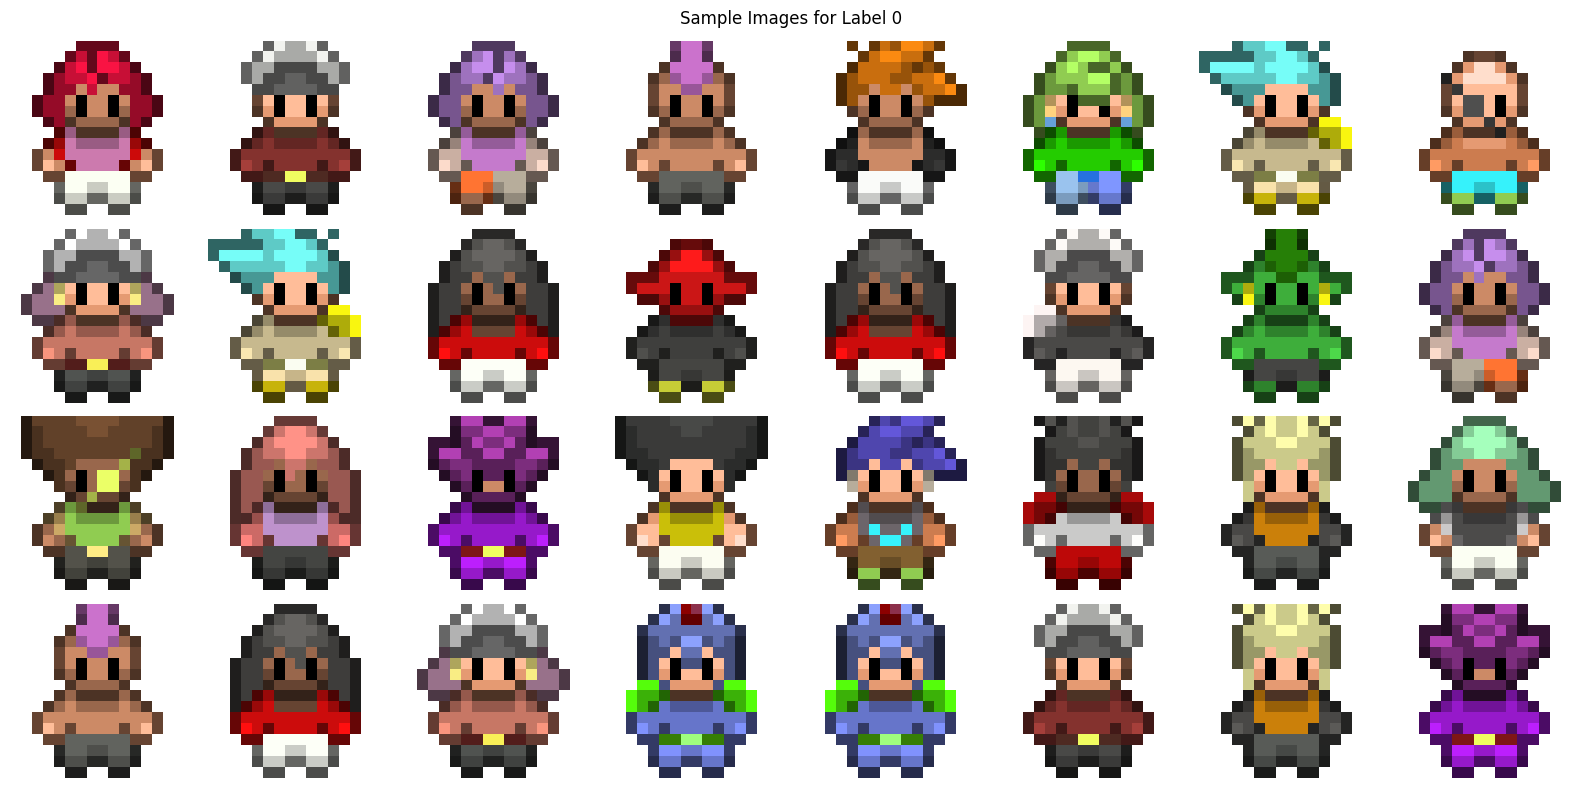

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from zipfile import ZipFile
import io

def load_data_from_zip(zip_path):
    with ZipFile(zip_path, 'r') as zf:
        # Load sprites array
        with zf.open('sprites.npy') as f:
            sprites = np.load(io.BytesIO(f.read()))
        
        # Load labels array
        with zf.open('sprites_labels.npy') as f:
            labels = np.load(io.BytesIO(f.read()))
    
    # Convert one-hot encoded labels to class indices
    if len(labels.shape) > 1 and labels.shape[1] > 1:  # Check if one-hot encoded
        labels = np.argmax(labels, axis=1)
    
    return sprites, labels

def plot_label_samples(sprites, labels, label_num, num_samples=32):
    # Get indices for the specified label
    label_indices = np.where(labels == label_num)[0]
    
    print(f"Total images for label {label_num}: {len(label_indices)}")
    
    # Randomly select num_samples indices
    if len(label_indices) > num_samples:
        sample_indices = np.random.choice(label_indices, num_samples, replace=False)
    else:
        sample_indices = label_indices
        print(f"Warning: Only {len(label_indices)} images available for label {label_num}")
    
    # Create a grid of subplots (4x8)
    fig, axes = plt.subplots(4, 8, figsize=(16, 8))
    fig.suptitle(f'Sample Images for Label {label_num}')
    
    # Plot each image
    for idx, ax in enumerate(axes.flat):
        if idx < len(sample_indices):
            ax.imshow(sprites[sample_indices[idx]])
            ax.axis('off')
        else:
            ax.axis('off')
    
    plt.tight_layout()
    plt.show()

# Load the data
sprites, labels = load_data_from_zip('../../archive.zip')

# Print shapes to understand the data structure
print("Sprites shape:", sprites.shape)
print("Labels shape before conversion:", labels.shape)

# Get unique labels and their counts
unique_labels, counts = np.unique(labels, return_counts=True)
print("\nLabel distribution:")
for label, count in zip(unique_labels, counts):
    print(f"Label {label}: {count} images")

# Example usage:
plot_label_samples(sprites, labels, 0)  # Plot 32 samples from label 0